<a href="https://colab.research.google.com/github/haroun1999/IIA42021/blob/main/Product_tracking_YOLOV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRAINING A CUSTOM YOLOv4 Product Detector**

# **1) Creating *`yolov4`* and *`training`* folders in our drive**



# **2) Mount drive, link the folder and navigating to /mydrive/yolov4 folder**

In [ ]:
#mounting drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# creating a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

#Navigate to /mydrive/yolov4
%cd /mydrive/yolov4

# **3) Cloning `darknet` git repository** 

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

## **4(a) Uploading the Labeled custom dataset *`obj.zip`* file to the *`yolov4`* folder on the drive**


## **4(b) Creating the custom *`config`* file and upload it to our drive**

batch=64
subdivisions=16
width=416
height=416
channels=3
momentum=0.949
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
classes=1
learning_rate=0.001
burn_in=1000
max_batches = 6000
policy=steps
steps=4800,5400
scales=.1,.1






## **4(c) Creating your *`obj.data`* and *`obj.names`* files and upload to our drive**



## **4(d) Uploading the *`process.py`* script file to the *`yolov4`* folder on our drive**


##**5) Making changes in the `makefile` to enable OPENCV and GPU**

In [ ]:
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/My Drive/yolov4/darknet


# **6) Running `make` command to build darknet**

In [ ]:
# build darknet 
!make

# **7) Copying all the files from the *`yolov4`* folder to the darknet directory**

In [ ]:
%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..
%rm -rf cfg/
%mkdir cfg

In [ ]:
!unzip /mydrive/yolov4/obj.zip -d data/

In [ ]:
!cp /mydrive/yolov4/yolov4-custom.cfg cfg

In [ ]:
!cp /mydrive/yolov4/obj.names data
!cp /mydrive/yolov4/obj.data  data

In [ ]:
!cp /mydrive/yolov4/process.py .

# **8) Running the *`process.py`* python script to create the *`train.txt`* & *`test.txt`* files inside the *data* folder**

In [ ]:
!python process.py

# **9) Downloading the pre-trained *`yolov4`* weights**

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# **10) TRAINING**

## **Training the  detector** 


In [ ]:
# %%capture

!./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

## **Restarting the training from a certain checkpoint after being disconnected**

### **to restart training we run only Steps 2, 5, 6 and then we run the following command**

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_last.weights -dont_show -map

## **we use this simple hack for Auto-Click to avoid being kicked off Colab VM**

we press (Ctrl + Shift + i) . Go to console then Paste the following code and press Enter.

```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```


# **11) Check performance** 



In [ ]:
# defining helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


**Check the training chart**

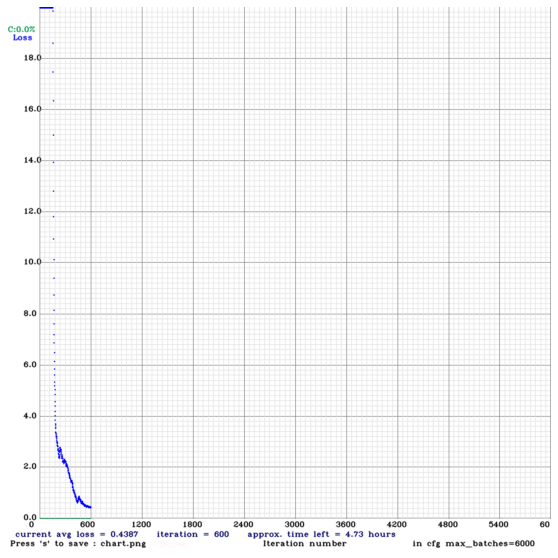

In [ ]:
imShow('chart.png')

**Check mAP (mean average precision)**

In [ ]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_4000.weights -points 0

# **12) Testing the custom product detector**

## **we make changes to our custom config file**
*  we change line batch to batch=1
*  we change line subdivisions to subdivisions=1


In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

## **Run detector on an image**

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
^C


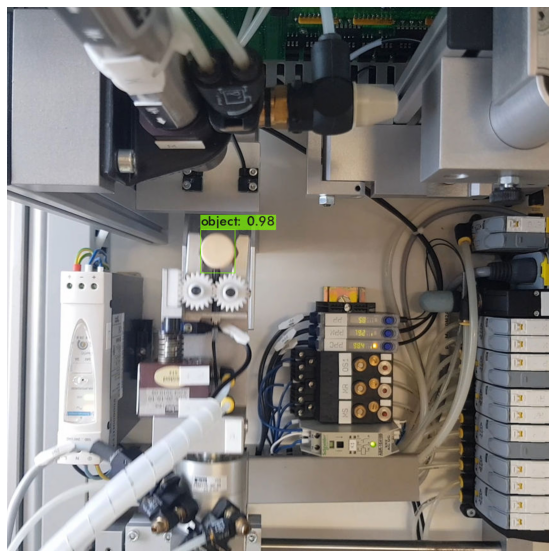

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights /content/gdrive/MyDrive/yolov4/test_images/11.png -thresh 0.7 
imShow('predictions.jpg')

## **Run detector on a video**

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights -dont_show /mydrive/mask_test_videos/test3.mp4 -i 0 -out_filename /mydrive/mask_test_videos/finalresult.avi 

# CREDITS
**instructor: Mustapha Hamdi**

**Students contributed:**
* Haroun Abessi : abessiharoun@gmail.com
* Rayen Tellissi: rayentellissi99@gmail.com
* Saifeddine Amri: saifamri156@gmail.com
* Yassine Hermi: yassine.hermi@insat.ucar.tn
